<a href="https://colab.research.google.com/github/PauVillegass/mecanicaAnalitica/blob/main/Prueba1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cálculo de Rm**

In [ ]:
from sympy import symbols, Eq, solve

rm, x = symbols('rm x')
Rmin = []

for s in [0.05 * i for i in range(1, 101)]:
    eq = Eq((rm**2)*(1-1/(1.2*(1+rm)))-s**2, 0)
    R = solve(eq, rm)

    for i in range(3):
        if R[i].is_real and R[i] >= 0:
            Rmin.append(R[i])



**Gauss-Legendre**

In [ ]:
import numpy as np

def gauss_legendre_quadrature(a, b, n, f):
    # Coeficientes y nodos de la cuadratura de Gauss-Legendre
    if n == 2:
        c = np.array([1, 1])
        x = np.array([-1/np.sqrt(3), 1/np.sqrt(3)])
    elif n == 3:
        c = np.array([5/9, 8/9, 5/9])
        x = np.array([-np.sqrt(3/5), 0, np.sqrt(3/5)])
    elif n == 4:
        c = np.array([(18-np.sqrt(30))/36, (18+np.sqrt(30))/36, (18+np.sqrt(30))/36, (18-np.sqrt(30))/36])
        x = np.array([-np.sqrt((3+2*np.sqrt(6/5))/7), -np.sqrt((3-2*np.sqrt(6/5))/7), np.sqrt((3-2*np.sqrt(6/5))/7), np.sqrt((3+2*np.sqrt(6/5))/7)])
    elif n == 16:
        c = np.array([0.02715246, 0.06225352, 0.09515851, 0.12462897, 0.14959599, 0.16915652,
                      0.18260342, 0.18945061, 0.18945061, 0.18260342, 0.16915652, 0.14959599,
                      0.12462897, 0.09515851, 0.06225352, 0.02715246])
        x = np.array([-0.98940093, -0.94457502, -0.8656312, -0.75540441, -0.61787624, -0.45801678,
                      -0.28160355, -0.09501251, 0.09501251, 0.28160355, 0.45801678, 0.61787624,
                      0.75540441, 0.8656312, 0.94457502, 0.98940093])
    else:
        raise ValueError("La cuadratura de Gauss-Legendre solo está implementada para n=2, 3, 4, y 16")

    # Transformación del intervalo [a, b] al intervalo [-1, 1]
    t = (b - a) / 2
    u = (a + b) / 2

    # Evaluación de la integral aproximada
    Int = 0
    for i in range(n):
        Int += c[i] * f(t * x[i] + u)
    Int *= t

    return Int

**Cálculo de la integral**

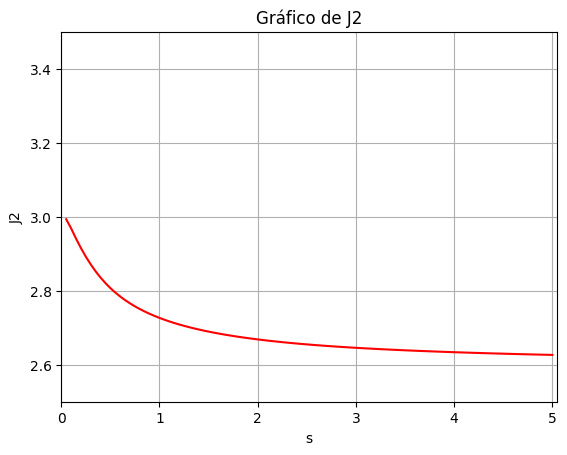

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Rmin = np.array([0.81274, 1.31745, 1.66631, 1.94455, 2.18524, 2.40386, 2.60931, 2.80688, 2.99948, 3.18955, 3.37802, 3.56543, 3.75208, 3.93817, 4.12385, 4.30922, 4.49434, 4.67928, 4.86407, 5.04875, 5.23335, 5.41787, 5.60234, 5.78676, 5.97114, 6.15548, 6.3398, 6.52409, 6.70838, 6.89266, 7.07695, 7.26124, 7.44554, 7.62985, 7.81418, 7.99852, 8.18287, 8.36725, 8.55165, 8.73607, 8.92052, 9.105, 9.2895, 9.47403, 9.65859, 9.84319, 10.0278, 10.2124, 10.397, 10.5817, 10.7664, 10.9512, 11.136, 11.3209, 11.5058, 11.6907, 11.8757, 12.0607, 12.2458, 12.4309, 12.616, 12.8011, 12.9863, 13.1715, 13.3567, 13.542, 13.7272, 13.9125, 14.0977, 14.283, 14.4683, 14.6536, 14.8388, 15.0241, 15.2094, 15.3947, 15.58, 15.7653, 15.9506, 16.1359, 16.3212, 16.5065, 16.6919, 16.8772, 17.0625, 17.2478, 17.4331, 17.6184, 17.8038, 17.9891, 18.1744, 18.3597, 18.545, 18.7303, 18.9156, 19.101, 19.2863, 19.4716, 19.6569, 19.8422, 20.0275])

J2 = np.zeros(100)
s = np.arange(0.05, 5.05, 0.05)
E = 1.2

def I(x, s, Rmin):
    V = (1 - x**2) / (1 - x**2 + Rmin)
    return 4 * s * x / (np.sqrt((Rmin**2) * (1 - V / E) - (s**2) * (1 - x**2)**2))

for i in range(100):
    f = lambda x: I(x, s[i], Rmin[i])
    J2[i] = 3.14163 - gauss_legendre_quadrature(0, 1, 16, f)


plt.plot(s, J2, 'red')
plt.xlim(0, 5.05)
plt.ylim(2.5, 3.5)
plt.xlabel('s')
plt.ylabel('J2')
plt.title('Gráfico de J2')
plt.grid(True)
plt.show()


In [ ]:
def f(x):
    return x**2

a = 0
b = 1
n = 16
Int = gauss_legendre_quadrature(a, b, n, f)
print("Integral aproximada:", Int)


Integral aproximada: 0.33333333203673987
